In [1]:
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from env import host, user, password
from wrangle import *

In [2]:
df =  prep_log(get_log_data())

In [3]:
df.head()

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Web Dev - Java


## 1). Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [4]:
# Looking at ds students
program3 = df[df.program_id == 3]


In [5]:
#removing json, / , jpeg, jpg, and svg
program3 = program3[~(program3.path.str.endswith('jpeg', na=False))]
program3 = program3[~(program3.path.str.endswith('jpg', na=False))]
program3 = program3[~(program3.path.str.endswith('json', na=False))]
program3 = program3[~(program3.path.str.endswith('svg', na=False))]
program3 = program3[~(program3.path.str.endswith('/', na=False))]

In [6]:
program3

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:40:30,2-storytelling/bad-charts,467,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:40:50,appendix/cli-git-overview,479,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:01:24,classification/project,841,99.162.244.233,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Data Science
2021-04-21 16:14:16,regression/project,841,99.162.244.233,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Data Science
2021-04-21 16:15:51,regression/project,841,99.162.244.233,133.0,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,Data Science


In [7]:
# looking at counts
program3.path.value_counts()

classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
6-regression/1-overview                     1124
                                            ... 
b-clustering/project                           1
7.4.2-series                                   1
sql/database                                   1
12-distributed-ml/5-inspect                    1
python/custom-sorting-functions                1
Name: path, Length: 633, dtype: int64

In [8]:
# group them up
ds = program3.groupby(['name'])

In [130]:
# fancy code for a new df with statistic of cohorts top views
ds_top_views = ds.apply(lambda x: x.path.value_counts(normalize = True).sort_values(ascending = False))

In [131]:
ds_top_views

name                                                                                                                                                                                                                                                                                                                            
Bayes     1-fundamentals/1.1-intro-to-data-science                                                                                                                                                                                                                                                                                  0.029779
          6-regression/1-overview                                                                                                                                                                                                                                                                                                   0.024242
          10-

In [132]:
# looking at each cohorts top 3
ds_top_views.groupby(['name']).head(3)
      


name                                              
Bayes     1-fundamentals/1.1-intro-to-data-science    0.029779
          6-regression/1-overview                     0.024242
          10-anomaly-detection/1-overview             0.017867
Curie     6-regression/1-overview                     0.034662
          1-fundamentals/1.1-intro-to-data-science    0.026855
          3-sql/1-mysql-overview                      0.025690
Darden    classification/overview                     0.046017
          sql/mysql-overview                          0.032116
          anomaly-detection/overview                  0.024564
Easley    classification/overview                     0.040366
          fundamentals/intro-to-data-science          0.033745
          sql/mysql-overview                          0.026760
Florence  fundamentals/intro-to-data-science          0.105489
          python/data-types-and-variables             0.044254
          sql/mysql-overview                          0.034820
Name

In [133]:
# highlighting an anomoly
pd.DataFrame(ds_top_views.groupby(['name']).head(10)).style.highlight_max(color = 'yellow', axis = 0)


In [13]:
# making it a df
ds_top_3 = pd.DataFrame(ds_top_views.groupby(['name']).head(3))

<AxesSubplot:ylabel='name'>

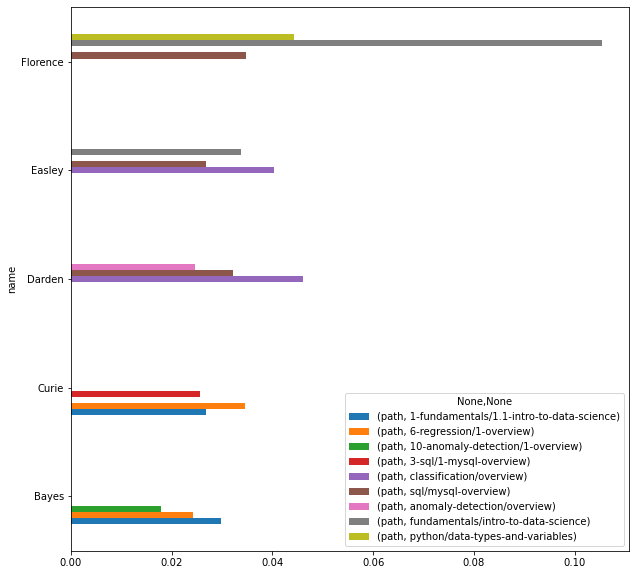

In [14]:
# graphing that DF
fig, ax = plt.subplots(figsize=(10,10))

ds_top_3.unstack().plot.barh(ax=ax)

**Florence spent way more time accessing the fundementals intro than any other cohort, even condisering the course change between bayes and curie**

In [15]:
program1 = df[df.program_id == 1]

In [16]:
# I will not be cautious using any information from these cohorts moving foward last one graduated 5 years ago.
# will cirlce back for further exploration with later cohorts.
program1.end_date.max()

Timestamp('2017-09-22 00:00:00')

In [17]:
# Making a program for current web dev, i wont be making one for the discontinued php course
program2 = df[df.program_id == 2]

In [18]:
# This is gonna be the sister program to data science currently
program2.end_date.max()

Timestamp('2021-10-01 00:00:00')

In [19]:
#same as earlier with the ds df
program2 = program2[~(program2.path.str.endswith('jpg', na=False))]
program2 = program2[~(program2.path.str.endswith('json', na=False))]
program2 = program2[~(program2.path.str.endswith('svg', na=False))]
program2 = program2[~(program2.path.str.endswith('/', na=False))]

In [20]:
# group it up
wd = program2.groupby(['name'])

In [21]:
# search for top view by cohort
wd_top_views = wd.apply(lambda x: x.path.value_counts(normalize = True).sort_values(ascending = False))

In [22]:
#top 3 by cohort
wd_top_views.groupby(['name']).head(3)
      

name                   
Andromeda  toc             0.026812
           javascript-i    0.021685
           spring          0.020466
Apex       toc             0.026408
           html-css        0.024061
                             ...   
Yosemite   javascript-i    0.023360
           html-css        0.019846
Zion       toc             0.041309
           javascript-i    0.025293
           java-iii        0.021233
Name: path, Length: 81, dtype: float64

In [23]:
# make it a df and highlight
pd.DataFrame(wd_top_views.groupby(['name']).head(3)).style.highlight_max(color = 'yellow', axis = 0)



In [24]:
# variable it
wd_top_3 = pd.DataFrame(wd_top_views.groupby(['name']).head(3))

<AxesSubplot:xlabel='name'>

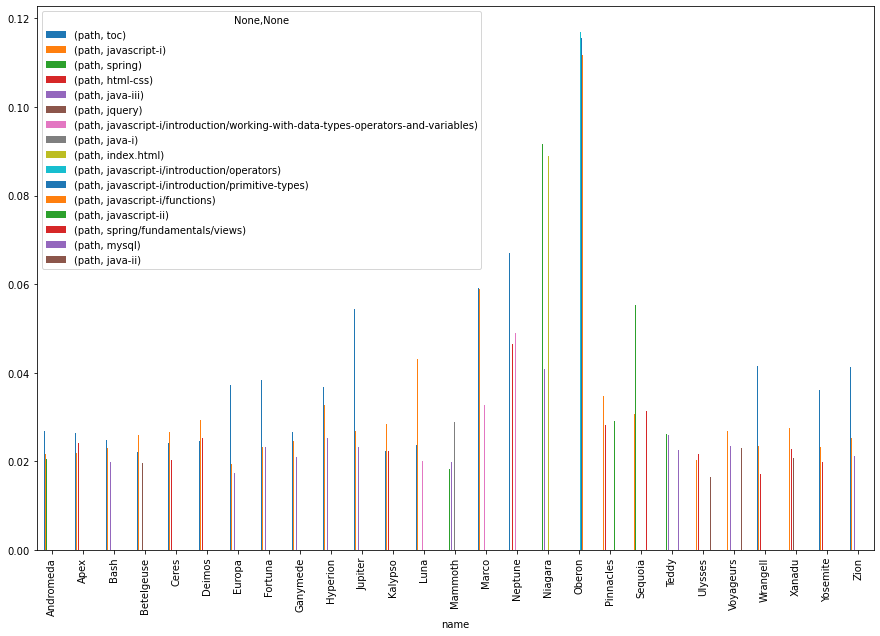

In [25]:
# plot it
fig, ax = plt.subplots(figsize=(15,10))

wd_top_3.unstack().plot.bar(ax=ax)

**Oberon spent a ton of time on the basics for javascript, unlike other courses they spent time on specific sub lessons including javascript-i/introduction/operators,javascript-i/introduction/primitive-types, javascript-i/introduction/functions. Niagara also saw relitivley high usage compared to the rest of the cohorts.**

# 2). Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [26]:
program3.head()

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:40:30,2-storytelling/bad-charts,467,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:40:50,appendix/cli-git-overview,479,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science


In [27]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    '''returns a df of probaility and counts'''
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [28]:
path_ds_df = value_counts_and_frequencies(program3.path)

In [125]:
path_ds_df.head(10)

,count,proba
classification/overview,1785,0.022421
1-fundamentals/1.1-intro-to-data-science,1633,0.020512
sql/mysql-overview,1424,0.017887
fundamentals/intro-to-data-science,1413,0.017748
6-regression/1-overview,1124,0.014118
anomaly-detection/overview,804,0.010099
10-anomaly-detection/1-overview,751,0.009433
3-sql/1-mysql-overview,707,0.008880
stats/compare-means,668,0.008391
python/data-types-and-variables,667,0.008378


<AxesSubplot:>

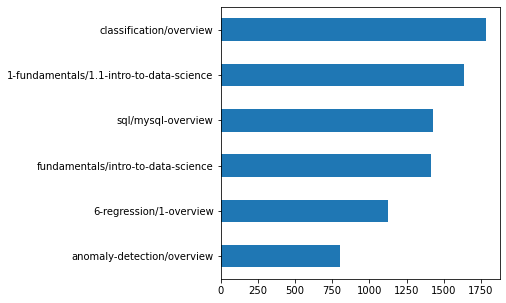

In [30]:
path_ds_df['count'].sort_values().tail(6).plot.barh(figsize=(5, 5))

Lessons most accessed by DS students are as follows
- classification/overview	
- 1-fundamentals/1.1-intro-to-data-science
- sql/mysql-overview
- fundamentals/intro-to-data-science(rework of course in 2nd spot)
- 6-regression/1-overview
- anomaly-detection/overview

In [31]:
path_wbcur_df = value_counts_and_frequencies(program2.path)

In [32]:
path_wbcur_df.head()

,count,proba
toc,16517,0.028344
javascript-i,15640,0.026839
java-iii,11290,0.019374
html-css,11285,0.019366
java-ii,10459,0.017948


<AxesSubplot:>

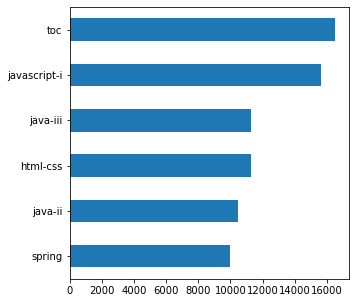

In [33]:
path_wbcur_df['count'].sort_values().tail(6).plot.barh(figsize=(5, 5))

Lessons most accessed by Web Dev students of the current Java based program are as follows
- javascript-i
- toc
- java-iii
- html-css
- java-ii

# 3) Which lessons are least accessed?

<AxesSubplot:title={'center':'30 Least Commonly Requested Pages'}>

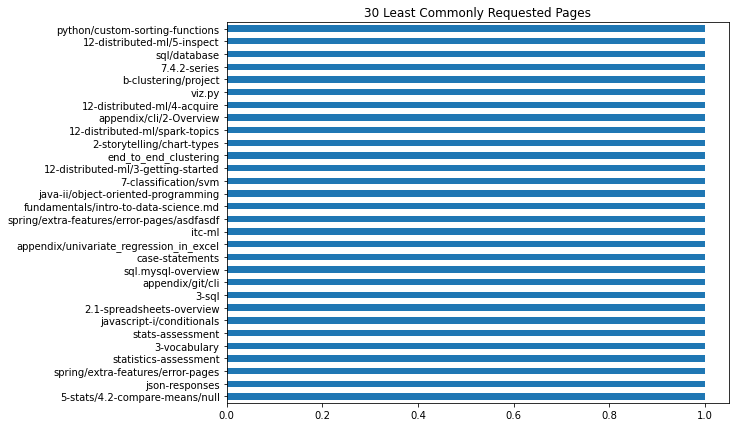

In [46]:
fig, ax = plt.subplots(figsize=(9,7))
program3.path.value_counts().tail(30).plot.barh(
    title='30 Least Commonly Requested Pages Data Science students',
)

In [48]:
program3.path.value_counts().tail(30)

5-stats/4.2-compare-means/null                1
json-responses                                1
spring/extra-features/error-pages             1
statistics-assessment                         1
3-vocabulary                                  1
stats-assessment                              1
javascript-i/conditionals                     1
2.1-spreadsheets-overview                     1
3-sql                                         1
appendix/git/cli                              1
sql.mysql-overview                            1
case-statements                               1
appendix/univariate_regression_in_excel       1
itc-ml                                        1
spring/extra-features/error-pages/asdfasdf    1
fundamentals/intro-to-data-science.md         1
java-ii/object-oriented-programming           1
7-classification/svm                          1
12-distributed-ml/3-getting-started           1
end_to_end_clustering                         1
2-storytelling/chart-types              

<AxesSubplot:title={'center':'30 Least Commonly Requested Pages'}>

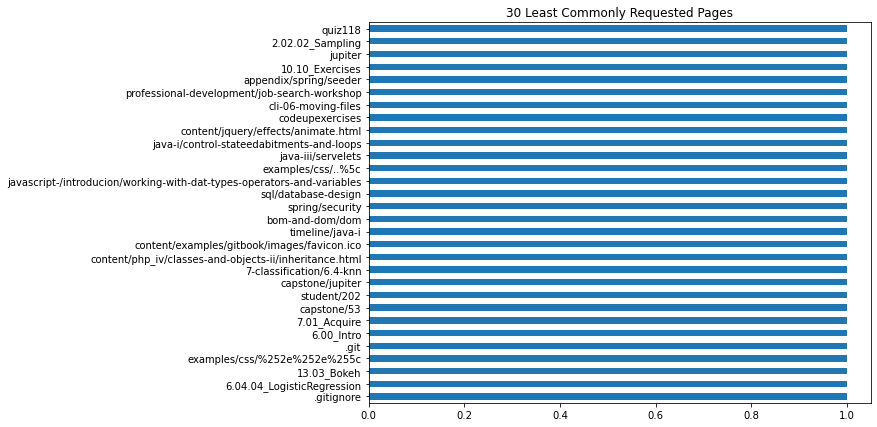

In [49]:
fig, ax = plt.subplots(figsize=(9,7))
program2.path.value_counts().tail(30).plot.barh(
    title='30 Least Commonly Requested Pages Web Dev Students',
)

I dont think this information is very useful, this could be 404 errors, lessons that have changed, a plethora of things. Of the 30 results for each group they only have a single view. All lessons have a path but not all paths are lessons. Least veiwed lessons are often typos, incomplete lessons or inaccesible to the course would advise not using this as a metric without and approved course list.

# 4) What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [ ]:
df

In [57]:

#Let's look at ds students that are referring to the curriculum after their graduation
DS_grads = df[(df.index > df['end_date']) & (df['program_id']== 3.0)]
DS_grads.head()

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2020-01-30 08:01:31,1-fundamentals/1.1-intro-to-data-science,485,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2020-01-30 08:01:32,1-fundamentals/modern-data-scientist.jpg,485,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2020-01-30 08:01:32,1-fundamentals/AI-ML-DL-timeline.jpg,485,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2020-01-31 11:05:04,/,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science
2020-01-31 11:05:13,1-fundamentals/1.1-intro-to-data-science,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science


In [60]:
DS_grads = DS_grads[~(DS_grads.path.str.endswith('jpeg', na=False))]
DS_grads = DS_grads[~(DS_grads.path.str.endswith('jpg', na=False))]
DS_grads = DS_grads[~(DS_grads.path.str.endswith('json', na=False))]
DS_grads = DS_grads[~(DS_grads.path.str.endswith('svg', na=False))]
DS_grads = DS_grads[~(DS_grads.path.str.endswith('/', na=False))]

In [62]:
DS_grads.path.value_counts().head(5)

sql/mysql-overview                          275
classification/overview                     267
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    127
Name: path, dtype: int64

<AxesSubplot:title={'center':'5 Most Commonly Requested Pages by DS Grads'}>

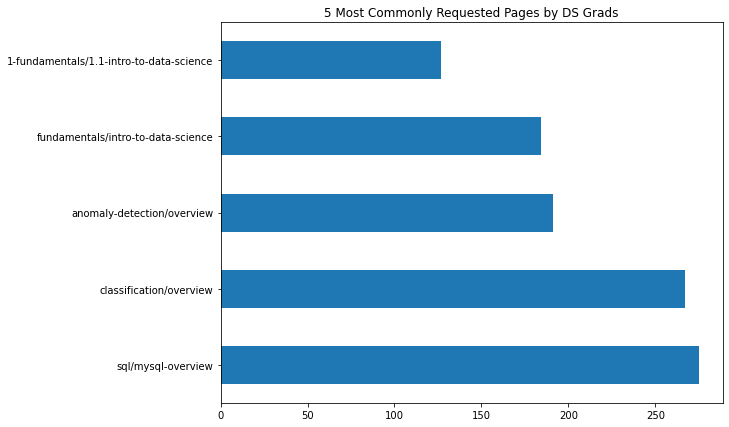

In [63]:
fig, ax = plt.subplots(figsize=(9,7))
DS_grads.path.value_counts().head(5).plot.barh(
    title='5 Most Commonly Requested Pages by DS Grads',
)

In [64]:
JAVA_grads = df[(df.index > df['end_date']) & (df['program_id']== 2.0)]
JAVA_grads.head()

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2018-01-26 10:59:02,index.html,21,71.137.146.71,16.0,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0,Web Dev - Java
2018-01-26 10:59:06,java-i,21,71.137.146.71,16.0,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0,Web Dev - Java
2018-01-26 11:36:27,/,26,97.105.19.61,18.0,Pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0,Web Dev - Java
2018-01-26 11:36:35,javascript-i,26,97.105.19.61,18.0,Pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0,Web Dev - Java
2018-01-26 11:36:38,javascript-i/functions,26,97.105.19.61,18.0,Pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0,Web Dev - Java


In [65]:
JAVA_grads = JAVA_grads[~(JAVA_grads.path.str.endswith('jpeg', na=False))]
JAVA_grads = JAVA_grads[~(JAVA_grads.path.str.endswith('jpg', na=False))]
JAVA_grads = JAVA_grads[~(JAVA_grads.path.str.endswith('json', na=False))]
JAVA_grads = JAVA_grads[~(JAVA_grads.path.str.endswith('svg', na=False))]
JAVA_grads = JAVA_grads[~(JAVA_grads.path.str.endswith('/', na=False))]

In [68]:
JAVA_grads.path.value_counts().head(5)

javascript-i    2416
spring          2368
html-css        1861
java-i          1831
java-ii         1730
Name: path, dtype: int64

<AxesSubplot:title={'center':'5 Most Commonly Requested Pages by Java Grads'}>

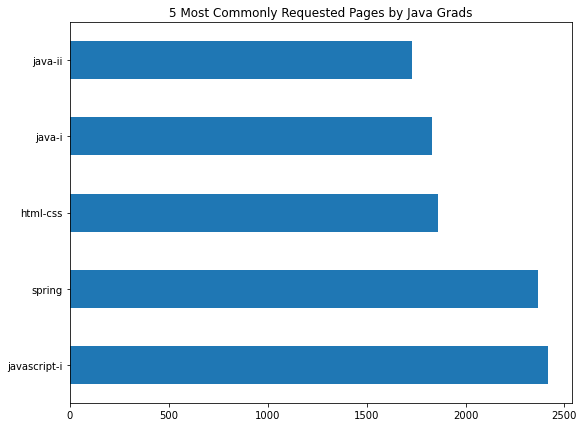

In [72]:
fig, ax = plt.subplots(figsize=(9,7))
JAVA_grads.path.value_counts().head(5).plot.barh(
    title='5 Most Commonly Requested Pages by Java Grads',
)

In [71]:
PHP_grads = df[(df.index > df['end_date']) & (df['program_id']== 1.0)]
PHP_grads.head()

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP
2018-01-26 10:14:47,/,11,97.105.19.61,1.0,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP


In [75]:
PHP_grads = PHP_grads[~(PHP_grads.path.str.endswith('jpeg', na=False))]
PHP_grads = PHP_grads[~(PHP_grads.path.str.endswith('jpg', na=False))]
PHP_grads = PHP_grads[~(PHP_grads.path.str.endswith('json', na=False))]
PHP_grads = PHP_grads[~(PHP_grads.path.str.endswith('svg', na=False))]
PHP_grads = PHP_grads[~(PHP_grads.path.str.endswith('/', na=False))]

In [77]:
JAVA_grads.path.value_counts().head(5)

javascript-i    2416
spring          2368
html-css        1861
java-i          1831
java-ii         1730
Name: path, dtype: int64

<AxesSubplot:title={'center':'5 Most Commonly Requested Pages by Java Grads'}>

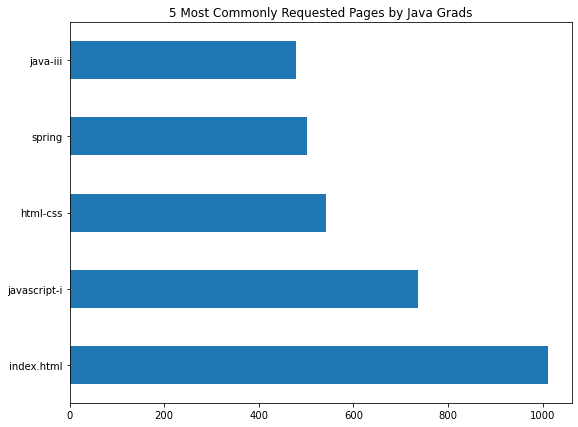

In [76]:
fig, ax = plt.subplots(figsize=(9,7))
PHP_grads.path.value_counts().head(5).plot.barh(
    title='5 Most Commonly Requested Pages by Java Grads',
)

# 5) At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [79]:
df['timestamp_year'] = df.index.year
df.head(1)

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program,timestamp_year
date,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Web Dev - PHP,2018


In [83]:
df[(df.program == 'Data Science') & (df.path.str.contains('java'))]

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program,timestamp_year
date,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,97.105.19.58,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:30:44,javascript-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:31:07,javascript-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:31:11,java-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:31:12,javascript-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:31:14,java-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:31:19,java-ii,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:32:23,javascript-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019
2019-09-25 19:32:34,java-i,476,136.50.49.145,34.0,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,2019


2 students from Bayes and one from Curie accesed java courses in late December 2019 and the Currie student accesed it as late as 2020

In [115]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

In [116]:
df[(df.program.str.contains('Web Dev')) & (df.path.str.contains('science'))]

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program,timestamp_year
date,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,70.120.5.227,25.0,Wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,Web Dev - Java,2019
2019-04-13 01:40:39,data-science,220,70.120.5.227,25.0,Wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,Web Dev - Java,2019
2019-08-23 11:45:04,1-fundamentals/1.1-intro-to-data-science,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-08-23 11:46:16,1-fundamentals/1.1-intro-to-data-science,423,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-08-23 11:46:29,1-fundamentals/1.1-intro-to-data-science,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-08-23 11:46:31,1-fundamentals/1.1-intro-to-data-science,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-08-26 08:53:28,1-fundamentals/1.1-intro-to-data-science,41,97.105.19.58,21.0,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Web Dev - Java,2019
2019-08-26 08:54:43,1-fundamentals/1.2-data-science-pipeline,41,97.105.19.58,21.0,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Web Dev - Java,2019
2019-08-27 08:50:09,1-fundamentals/1.1-intro-to-data-science,41,97.105.19.58,21.0,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Web Dev - Java,2019


In [122]:
df[(df.user_id == 410)]

,path,user_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,program,timestamp_year
date,,,,,,,,,,,,
2019-05-29 10:01:28,/,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 10:08:55,html-css,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 10:08:59,html-css/introduction,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 11:56:31,html-css,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 12:00:39,html-css/introduction,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 12:01:03,html-css/forms,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 12:01:06,html-css/elements,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 12:01:07,html-css/introduction,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019
2019-05-29 13:33:31,html-css/elements,410,97.105.19.58,32.0,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Web Dev - Java,2019


In [123]:
wb_ds = df[(df.program.str.contains('Web Dev')) & (df.path.str.contains('science'))]

User 143 was part of both niagra and easly, There are web dev students that are  still accesing data science courses as late as 2021 with no ties to the data science course. We have people accesing both courses still and that should be investigated
